# Predicting The Energy Output of Wind Turbine Based on Weather Condition

# Data Collection

In [1]:
#We are taking the dataset of Wind Energy Based on Weather Condition
#This dataset download from Kaggle . In this dataset there are 5 Coloumns And 50530 Rows .
#The Columns Names DATA/TIME , LV ACTIVEPOWER(KW) , WIND SPEED(M/S) THEORETICAL_POWER_CURVE(KWH) , AND WIND DIRECTIONS(')

# Data Processing

In [2]:
#Importing All the  Important Libraries of Datascience
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading of data From the Directory
data = pd.read_csv('dataset.csv')
data.head(5)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
#Complete info of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
Date/Time                        50530 non-null object
LV ActivePower (kW)              50530 non-null float64
Wind Speed (m/s)                 50530 non-null float64
Theoretical_Power_Curve (KWh)    50530 non-null float64
Wind Direction (°)               50530 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [5]:
#Complete Description of the Dataset 
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [6]:
#Checking Wheather the null values present in  the dataset or not(Taking Care of Null Values).
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [7]:
#Convert the Format of date and time 
data['Date/Time'] = pd.to_datetime(data['Date/Time'],format='%d %m %Y %H:%M')
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
Date/Time                        50530 non-null datetime64[ns]
LV ActivePower (kW)              50530 non-null float64
Wind Speed (m/s)                 50530 non-null float64
Theoretical_Power_Curve (KWh)    50530 non-null float64
Wind Direction (°)               50530 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


In [8]:
#Make another Coloumns for Month , Day , Hour , Year for accuurate Prediction.
data['Month']=data['Date/Time'].dt.month
data['Day']=data['Date/Time'].dt.day 
data['hour']=data['Date/Time'].dt.hour 

In [9]:
data['year']=data['Date/Time'].dt.year 


# Data Visualization

C:\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


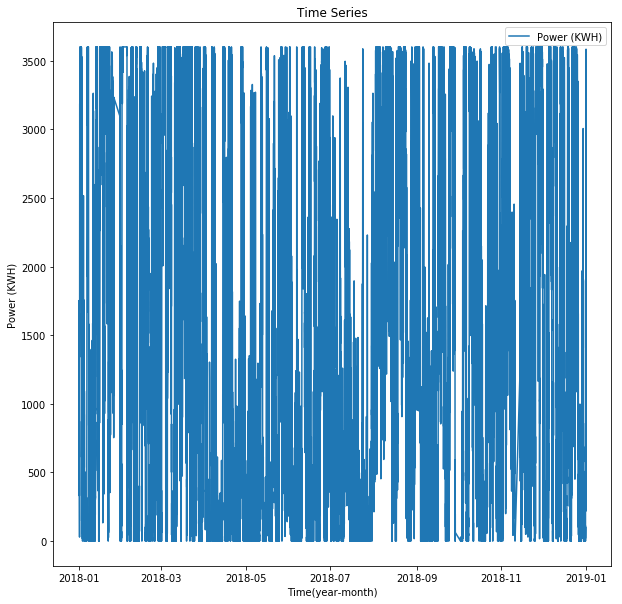

In [10]:
#Plotting Of Power Vs Time
data.index = data['Date/Time']                        # indexing the Datetime to get the time period on the x-axis.
ts = data['Theoretical_Power_Curve (KWh)']
plt.figure(figsize=(10,10))
plt.plot(ts, label='Power (KWH)')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Power (KWH)")
plt.legend(loc='best')
plt.show()

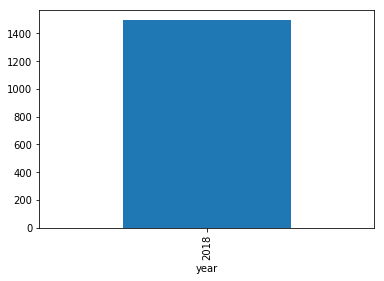

In [11]:
#Plotting Of Year/Month/Day By Using Groupby
d = data.groupby('year')['Theoretical_Power_Curve (KWh)'].mean().plot.bar()
plt.show()

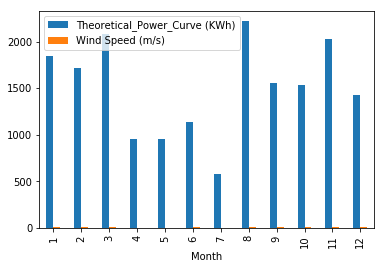

In [12]:
#Plotting Month , Theoretical Power Curve and Wind Speed By using Groupby
e = data.groupby('Month')['Theoretical_Power_Curve (KWh)','Wind Speed (m/s)'].mean().plot.bar()
plt.show()


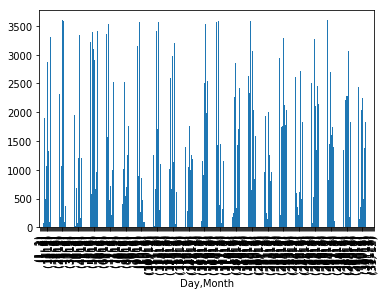

In [13]:
#Plotting Day , month and Theoretical power by using Groupby
data.groupby(['Day','Month'])['Theoretical_Power_Curve (KWh)'].mean().plot.bar()
plt.show()

# Labels And Feature Extraction For A Model

In [14]:
#Features Extraction
x = data.drop(['Theoretical_Power_Curve (KWh)','Date/Time'],axis = 1)
x

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°),Month,Day,hour,year
Date/Time,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,259.994904,1,1,0,2018
2018-01-01 00:10:00,453.769196,5.672167,268.641113,1,1,0,2018
2018-01-01 00:20:00,306.376587,5.216037,272.564789,1,1,0,2018
2018-01-01 00:30:00,419.645905,5.659674,271.258087,1,1,0,2018
2018-01-01 00:40:00,380.650696,5.577941,265.674286,1,1,0,2018
2018-01-01 00:50:00,402.391998,5.604052,264.578613,1,1,0,2018
2018-01-01 01:00:00,447.605713,5.793008,266.163605,1,1,1,2018
2018-01-01 01:10:00,387.242188,5.306050,257.949493,1,1,1,2018
2018-01-01 01:20:00,463.651215,5.584629,253.480698,1,1,1,2018


In [15]:
#Labels Extraction
y = data['Theoretical_Power_Curve (KWh)']
y

Date/Time
2018-01-01 00:00:00     416.328908
2018-01-01 00:10:00     519.917511
2018-01-01 00:20:00     390.900016
2018-01-01 00:30:00     516.127569
2018-01-01 00:40:00     491.702972
2018-01-01 00:50:00     499.436385
2018-01-01 01:00:00     557.372363
2018-01-01 01:10:00     414.898179
2018-01-01 01:20:00     493.677652
2018-01-01 01:30:00     475.706783
2018-01-01 01:40:00     535.841397
2018-01-01 01:50:00     603.014077
2018-01-01 02:00:00     824.662514
2018-01-01 02:10:00     693.472641
2018-01-01 02:20:00     808.098138
2018-01-01 02:30:00     859.459021
2018-01-01 02:40:00     759.434537
2018-01-01 02:50:00     785.281010
2018-01-01 03:00:00     773.172863
2018-01-01 03:10:00     781.771216
2018-01-01 03:20:00     700.764700
2018-01-01 03:30:00     970.736627
2018-01-01 03:40:00    1315.048928
2018-01-01 03:50:00    1151.265744
2018-01-01 04:00:00    1497.583724
2018-01-01 04:10:00    1752.199662
2018-01-01 04:20:00    1668.470707
2018-01-01 04:30:00    1461.815791
2018-01-01

# Model Build Apply Sklearn

In [16]:
#Importing Polynomial And Linear Regression From Sklearn Libraries For model Building
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=6)),('linear', LinearRegression(fit_intercept=False))])


In [17]:
#Division Of Training And Testing Of Dataset By Using Sklearn Library
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [19]:
#Training Of Model 
model = model.fit(X_train,y_train)

# Evaluation

In [20]:
#Prediction Given By our  model
pred_x = model.predict(X_test)

In [21]:
#Getting Our Model's Predictions
print(pred_x)

[3475.58858916 3039.94771972  717.75560883 ...  -57.17297375   17.78730725
 2730.34180345]


In [22]:
#Importing mean_squared_error module from sklearn library for getting Mean Square Error of our Model
from sklearn.metrics import mean_squared_error

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred_x))

y_test.shape

Mean squared error: 1224.98


(15159,)

In [23]:
#Importing mean_absolute_error module from sklearn library for getting Mean absolute Error of our Model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred_x)

22.305318522315186

In [24]:
#Accuracy of Our Model
model.score(X_test,y_test)

0.9993447423845554

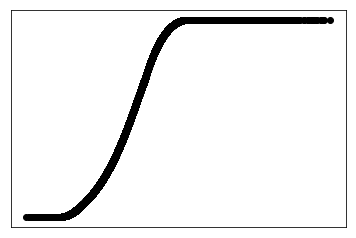

In [25]:
plt.scatter(X_test.iloc[:,1],y_test, color='black')


plt.xticks(())
plt.yticks(())

plt.show()

# Visualizaton of Prediction By Plotting between Actual and Predicted Values

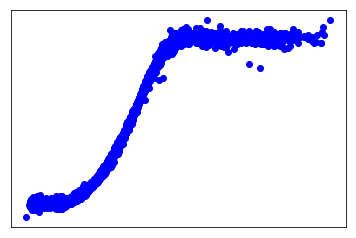

In [26]:
plt.scatter(X_test.iloc[:,1],pred_x,color='blue')
plt.xticks(())
plt.yticks(())

plt.show()

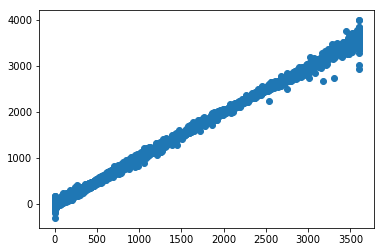

In [27]:
plt.scatter(y_test,pred_x)
plt.show()

In [28]:
#The Accuracy of Our Model is : 0.99
#The Mean Square Error of Our Model is : 1224.98
#The Mean Absolute Error of our Model is : 22.30
#Hence Here We Get The Accuracy Of About 99% Which is Approx 100 . So Our Model Gives Best Prediction of Energy
#Based On Weather Conditions.